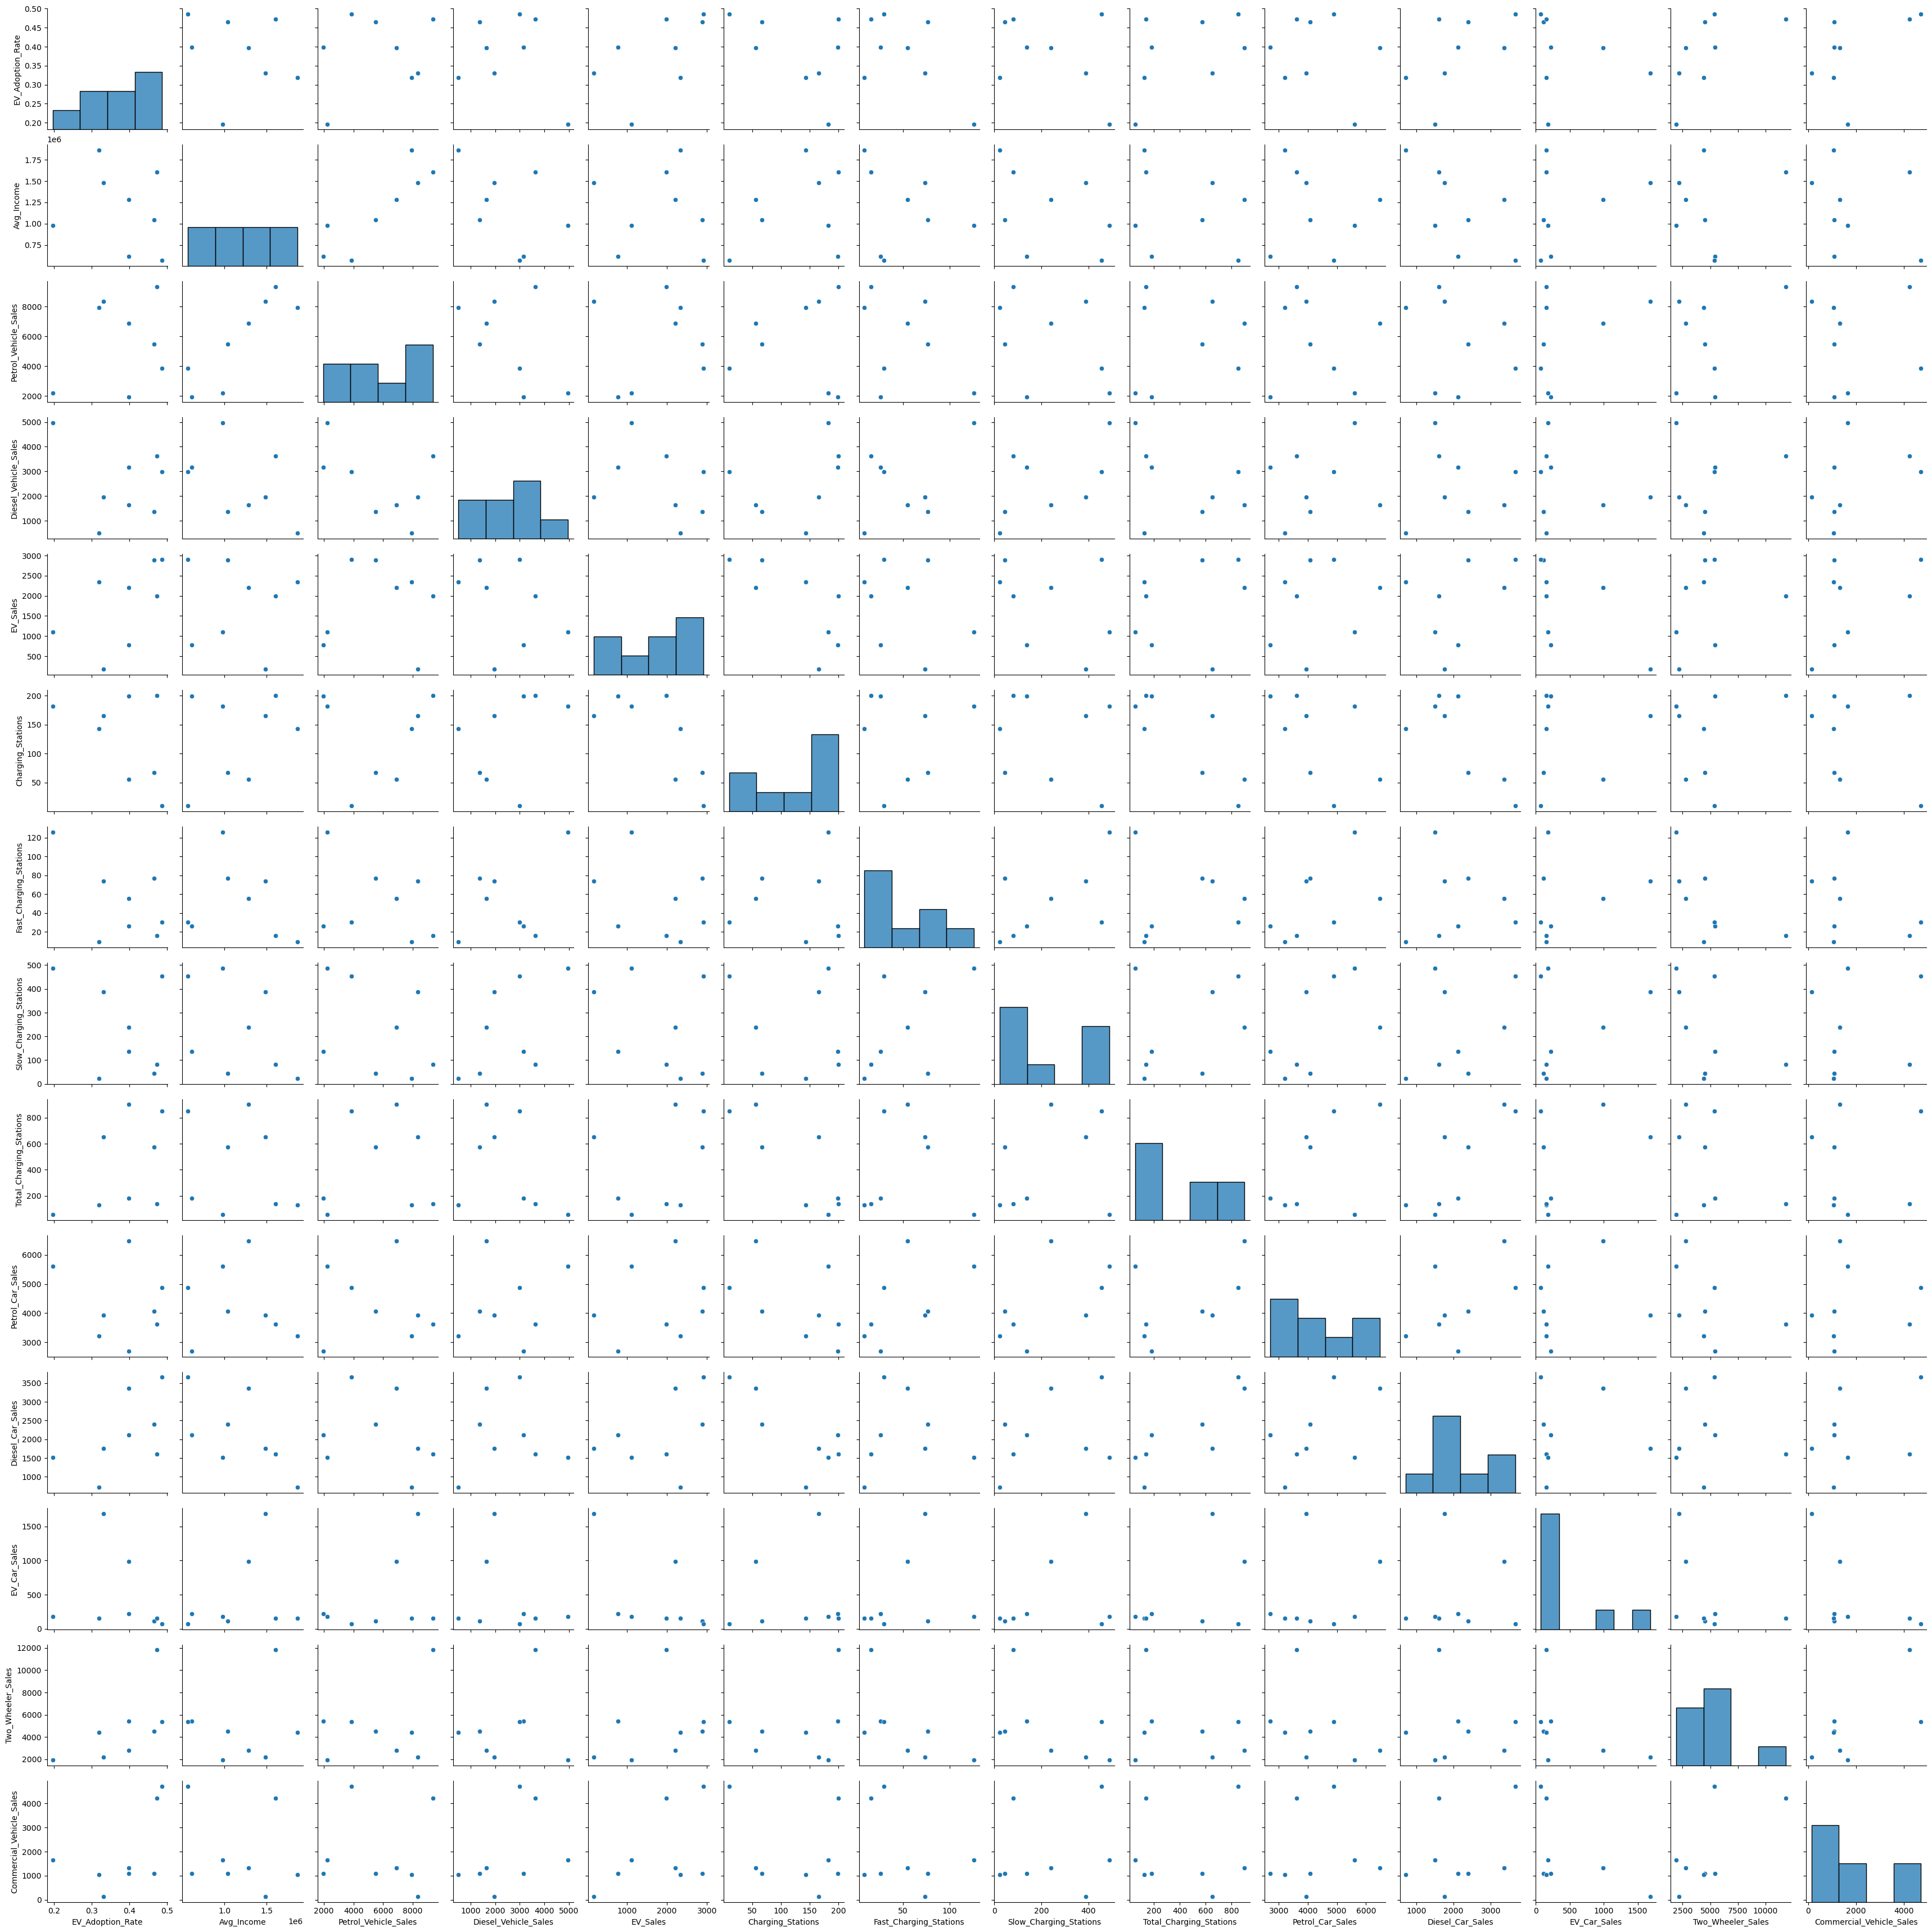

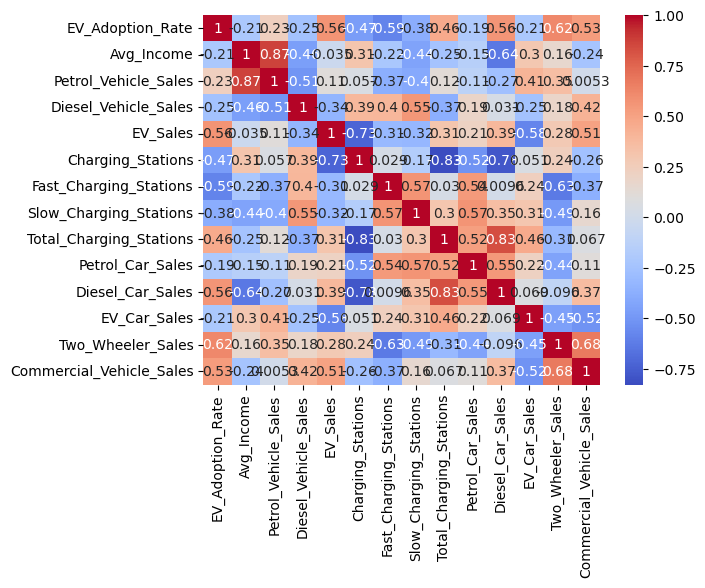

C:\Users\INTEL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


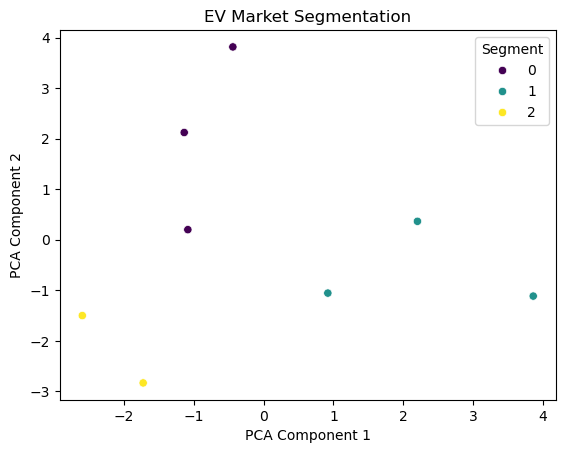

Segment Analysis:
          EV_Adoption_Rate    Avg_Income  Petrol_Vehicle_Sales  \
Segment                                                         
0                0.308564  1.027317e+06                4171.0   
1                0.449556  9.650750e+05                5419.0   
2                0.395915  1.733866e+06                8648.0   

         Diesel_Vehicle_Sales     EV_Sales  Charging_Stations  \
Segment                                                         
0                 3365.000000   686.000000         182.000000   
1                 2005.666667  2667.666667          44.333333   
2                 2064.000000  2165.500000         171.500000   

         Fast_Charging_Stations  Slow_Charging_Stations  \
Segment                                                   
0                     75.333333              337.333333   
1                     54.000000              246.000000   
2                     12.500000               52.000000   

         Total_Charging_Stations 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Formulate Key Questions for Market Analysis
# 1. What type of EV should the company produce? (Bike, Scooty, Sedan, SUV, Truck)
# 2. Who is the target customer? (Gender, Income, Profession, Geography)
# 3. What are the trends in vehicle type adoption (Petrol, Diesel, EV)?
# 4. What are the major influencing factors for EV adoption?

# Step 2: Data Collection
# Sources: Indian Govt. Data, Industry Reports, Kaggle Datasets
# Example Datasets:
# - Vehicle type data (Petrol/Diesel/EV sales trends)
# - EV adoption statistics
# - Demographics (Age, Income, Geography)

ev_data = pd.read_csv('ev_market_data.csv')  # Contains EV adoption rates, region, income levels, etc.
charging_data = pd.read_csv('charging_stations.csv')  # Charging station locations, availability
vehicle_sales_data = pd.read_csv('vehicle_sales.csv')  # Vehicle sales by type (EV, Petrol, Diesel)

# Step 3: Data Preprocessing
def preprocess_data(df):
    df = df.dropna()
    df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)  # Remove whitespace
    return df

ev_data = preprocess_data(ev_data)
charging_data = preprocess_data(charging_data)
vehicle_sales_data = preprocess_data(vehicle_sales_data)

# Ensure 'Region' column exists and is consistent
ev_data['Region'] = ev_data['Region'].astype(str)
charging_data['Region'] = charging_data['Region'].astype(str)
vehicle_sales_data['Region'] = vehicle_sales_data['Region'].astype(str)

# Remove duplicates
ev_data = ev_data.drop_duplicates(subset=['Region'])
charging_data = charging_data.drop_duplicates(subset=['Region'])
vehicle_sales_data = vehicle_sales_data.drop_duplicates(subset=['Region'])

# Merging datasets
merged_data = ev_data.merge(charging_data, on='Region', how='outer')
merged_data = merged_data.merge(vehicle_sales_data, on='Region', how='outer')

# Step 4: Exploratory Data Analysis (EDA)
numeric_data = merged_data.select_dtypes(include=[np.number])  # Select only numeric columns

sns.pairplot(numeric_data)
plt.show()

sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Step 5: Market Segmentation using Clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data.dropna())  # Drop NaN values before clustering

# Applying PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Applying KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
merged_data = merged_data.dropna()  # Ensure no NaN values
merged_data['Segment'] = kmeans.fit_predict(pca_data)

# Step 6: Visualizing Segments
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=merged_data['Segment'], palette='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('EV Market Segmentation')
plt.show()

# Step 7: Insights & Recommendations
numeric_cols = merged_data.select_dtypes(include=[np.number]).columns
segment_summary = merged_data.groupby('Segment')[numeric_cols].mean()
print("Segment Analysis:\n", segment_summary)

# Step 8: Strategy Development
# - Identify high-potential regions based on EV adoption & infrastructure
# - Target demographics with high adoption likelihood
# - Suggest optimal pricing based on market affordability
# - Recommend charging infrastructure expansion based on segment needs
